# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
| ------------- |-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

5. Applicants requesting a lower amount
6. Applicants that are not self employed
7. Applicants that are married with fewer dependents

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [114]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [5]:
# credit history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

(array([ 82., 308., 120.,  36.,  26.,   9.,   9.,   8.,   6.,   2.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  150.        ,  2395.83333333,  4641.66666667,  6887.5       ,
         9133.33333333, 11379.16666667, 13625.        , 15870.83333333,
        18116.66666667, 20362.5       , 22608.33333333, 24854.16666667,
        27100.        , 29345.83333333, 31591.66666667, 33837.5       ,
        36083.33333333, 38329.16666667, 40575.        , 42820.83333333,
        45066.66666667, 47312.5       , 49558.33333333, 51804.16666667,
        54050.        , 56295.83333333, 58541.66666667, 60787.5       ,
        63033.33333333, 65279.16666667, 67525.        , 69770.83333333,
        72016.66666667, 74262.5       , 76508.33333333, 78754.16666667,
        81000.        ]),
 <BarContainer object of 36 artists>)

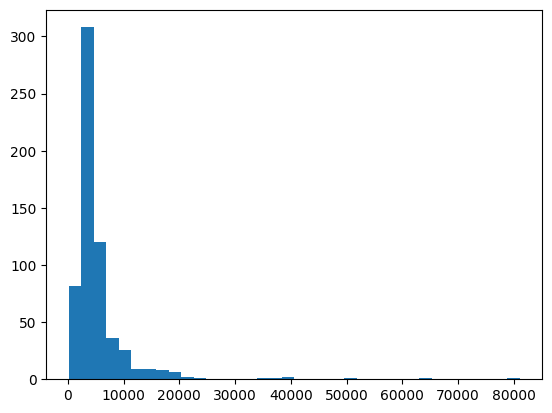

In [6]:
# applicant income
plt.hist(x=df['ApplicantIncome'], bins=36)

(array([306., 156.,  80.,  36.,  18.,   3.,   6.,   3.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([    0.        ,  1157.41666667,  2314.83333333,  3472.25      ,
         4629.66666667,  5787.08333333,  6944.5       ,  8101.91666667,
         9259.33333333, 10416.75      , 11574.16666667, 12731.58333333,
        13889.        , 15046.41666667, 16203.83333333, 17361.25      ,
        18518.66666667, 19676.08333333, 20833.5       , 21990.91666667,
        23148.33333333, 24305.75      , 25463.16666667, 26620.58333333,
        27778.        , 28935.41666667, 30092.83333333, 31250.25      ,
        32407.66666667, 33565.08333333, 34722.5       , 35879.91666667,
        37037.33333333, 38194.75      , 39352.16666667, 40509.58333333,
        41667.        ]),
 <BarContainer object of 36 artists>)

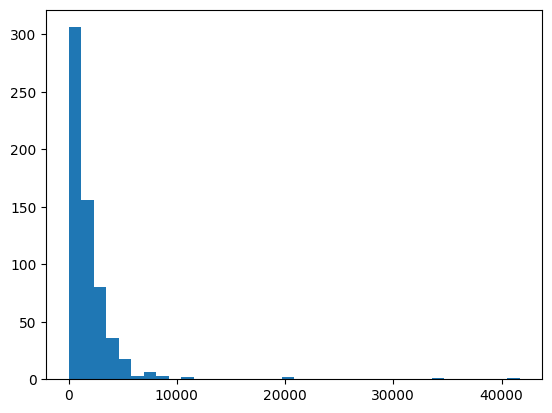

In [7]:
# coapplicant income
plt.hist(x=df['CoapplicantIncome'], bins=36)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [8]:
cat_features = df.select_dtypes(exclude=np.number).columns.tolist()
cat_features.remove('Loan_ID')
for col in cat_features:
    print(df[col].unique(), '\n')

['Male' 'Female' nan] 

['No' 'Yes' nan] 

['0' '1' '2' '3+' nan] 

['Graduate' 'Not Graduate'] 

['No' 'Yes' nan] 

['Urban' 'Rural' 'Semiurban'] 

['Y' 'N'] 



Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [9]:
for col in cat_features:
    print(df[col].value_counts(), '\n')

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



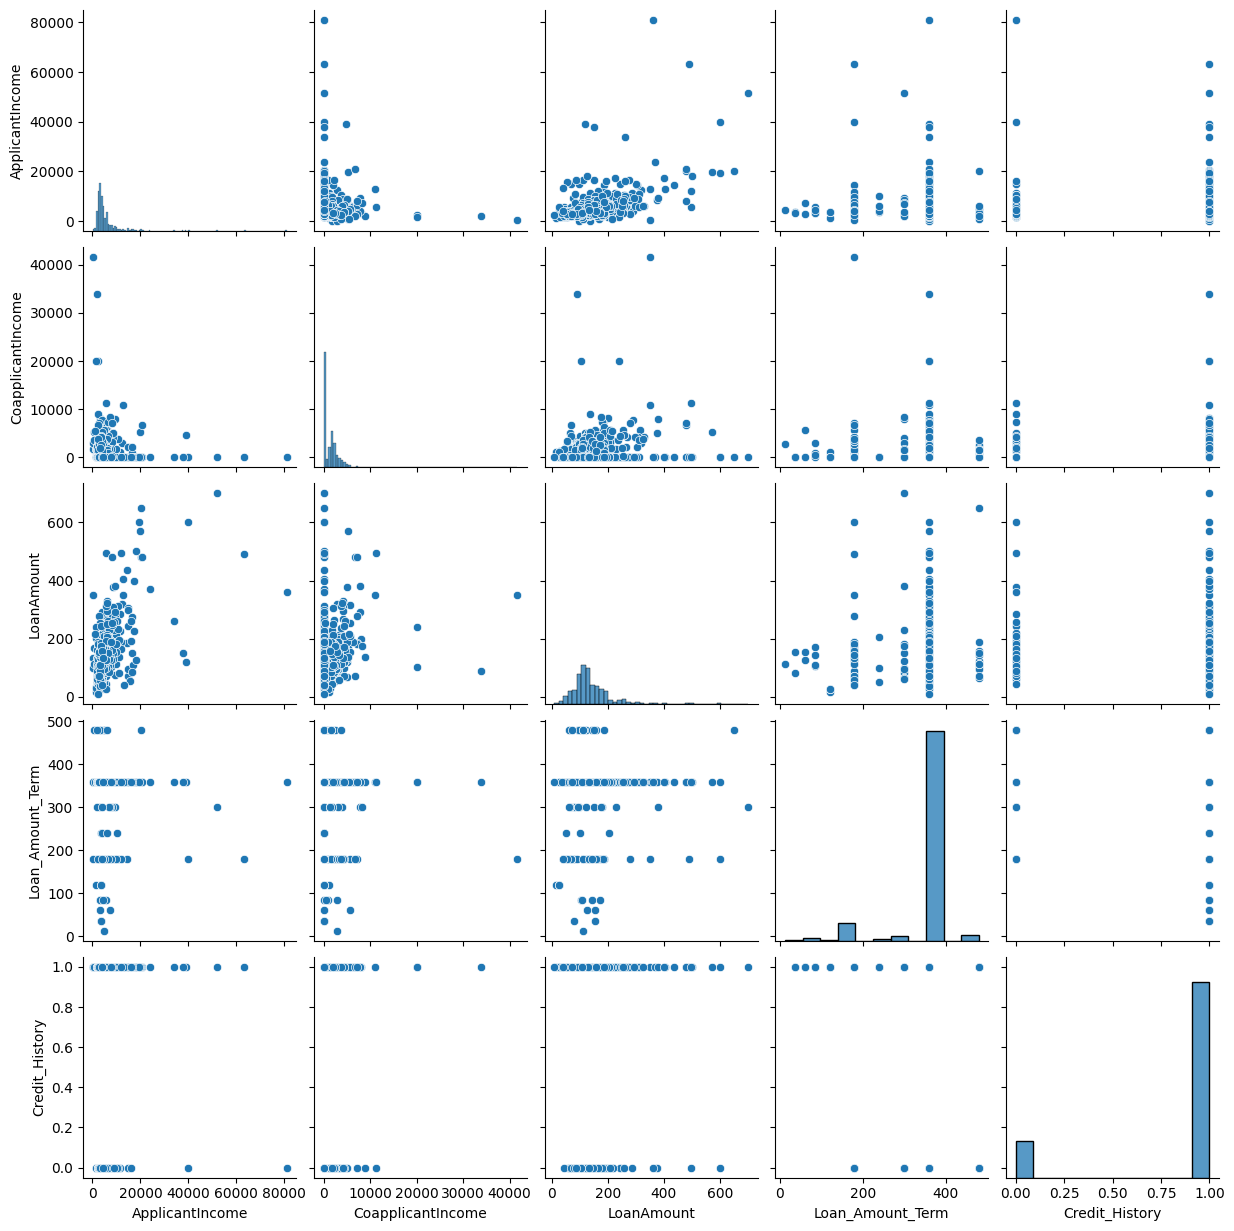

In [10]:
sns.pairplot(df)


Look at box plots to understand the distributions. 

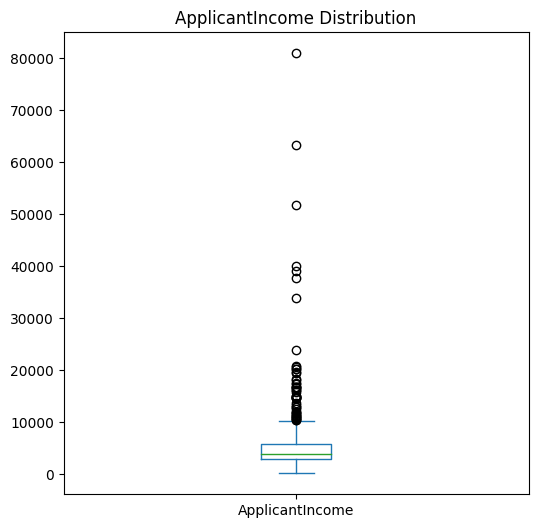

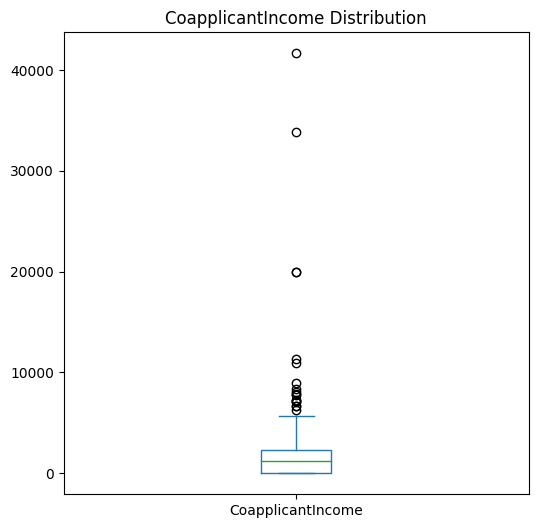

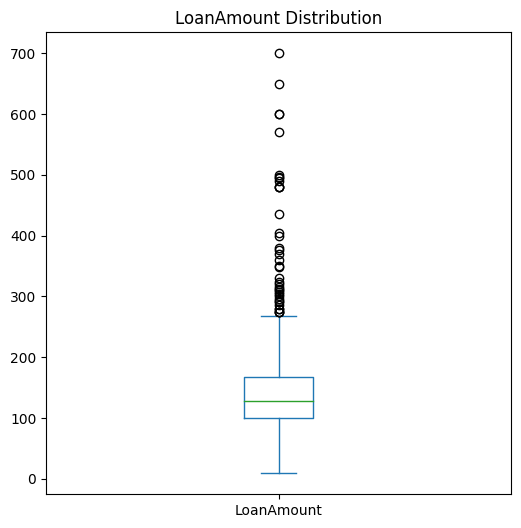

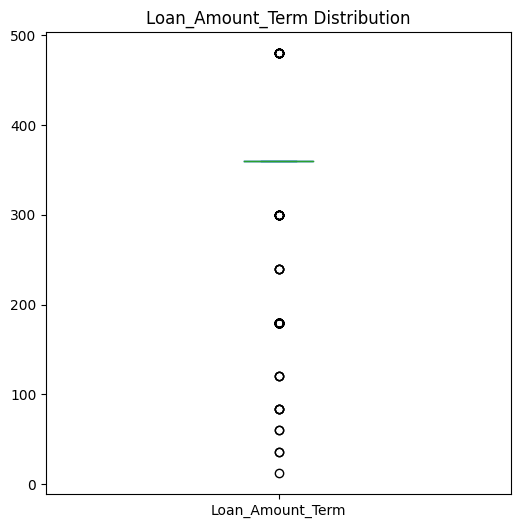

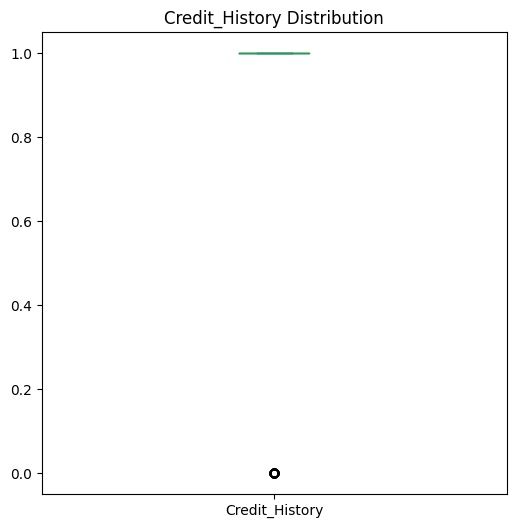

In [11]:
num_features = df.select_dtypes(include=np.number).columns.tolist()
for col in num_features:
    plt.rcParams['figure.figsize']=[6, 6]
    ax = df[col].plot(kind='box', title=f'{col} Distribution')
    plt.show()


Look at the distribution of income segregated  by `Education`

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

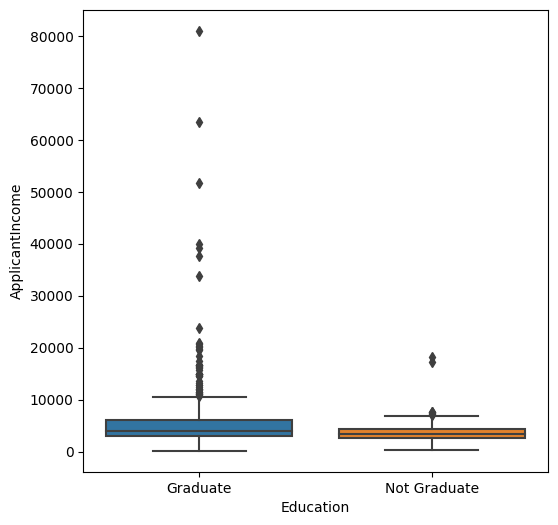

In [12]:
sns.boxplot(data=df, x = 'Education', y='ApplicantIncome')

Look at the histogram and boxplot of LoanAmount

(array([ 18.,  72., 191., 156.,  75.,  22.,  22.,  12.,   5.,   4.,   2.,
          1.,   7.,   0.,   1.,   2.,   1.,   1.]),
 array([  9.        ,  47.38888889,  85.77777778, 124.16666667,
        162.55555556, 200.94444444, 239.33333333, 277.72222222,
        316.11111111, 354.5       , 392.88888889, 431.27777778,
        469.66666667, 508.05555556, 546.44444444, 584.83333333,
        623.22222222, 661.61111111, 700.        ]),
 <BarContainer object of 18 artists>)

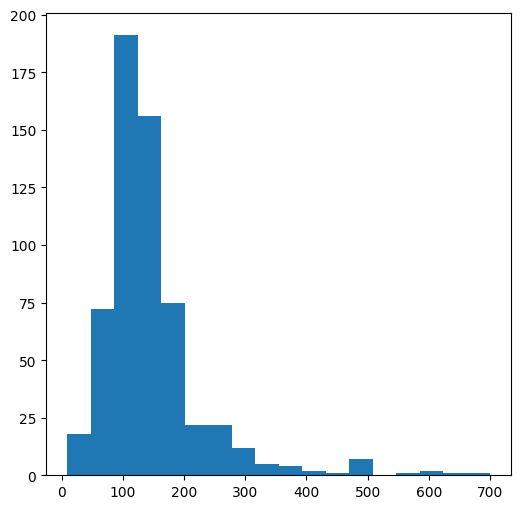

In [13]:
plt.hist(df['LoanAmount'], bins=18)

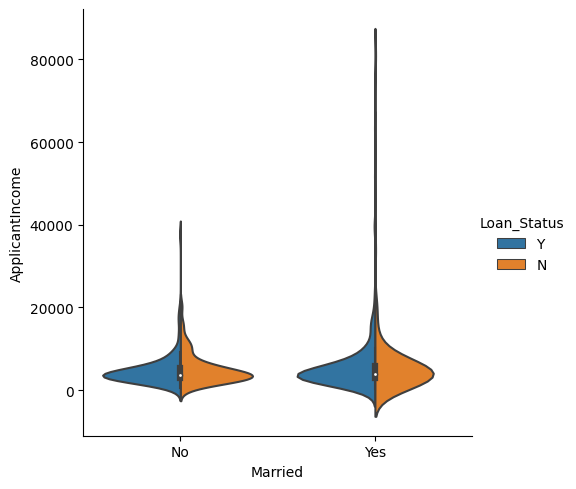

In [14]:
sns.catplot(data=df, kind='violin', x='Married', y='ApplicantIncome', hue='Loan_Status', split=True)

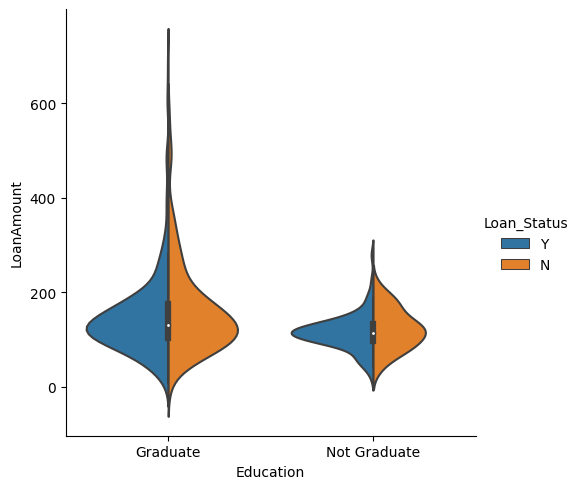

In [15]:
sns.catplot(data=df, kind='violin', x='Education', y='LoanAmount', hue='Loan_Status', split=True)

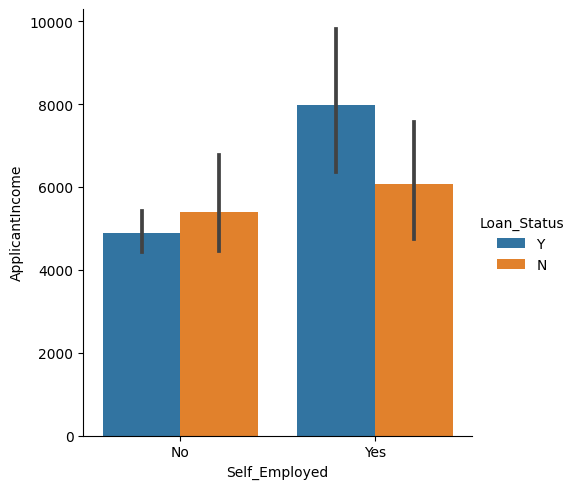

In [16]:
sns.catplot(data=df, kind='bar', x='Self_Employed', y='ApplicantIncome', hue='Loan_Status')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing as well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [17]:
pd.pivot_table(data=df, values='ApplicantIncome', index='Gender', columns='Married', aggfunc=np.mean)

Married,No,Yes
Gender,,
Female,4503.787500,4829.645161
Male,5236.146154,5529.540616


In [18]:
pd.pivot_table(data=df, values='LoanAmount', index='Dependents', columns='Education', aggfunc=np.mean)

Education,Graduate,Not Graduate
Dependents,,
0,141.344569,114.134328
1,164.371795,136.200000
2,160.453333,116.869565
3+,219.250000,112.384615


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

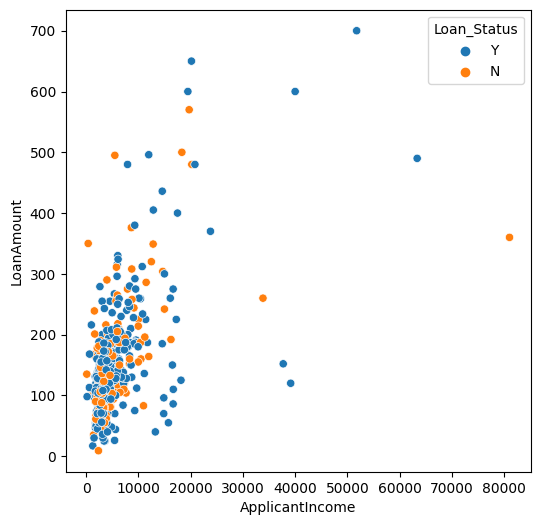

In [19]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [84]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=58)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(491, 11) (491,)
(123, 11) (123,)


In [23]:
X.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [85]:
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [86]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')


In [87]:
X_train_num = pd.DataFrame(imp_median.fit_transform(X_train[num_features]), columns=num_features)
X_train_cat = pd.DataFrame(imp_mode.fit_transform(X_train[cat_features]), columns= cat_features)


In [88]:
X_train_clean = pd.concat([X_train_num, X_train_cat], axis=1)

In [89]:
X_train_clean.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,2833.0,1857.0,126.0,360.0,Male,No,0,Graduate,No,1.0,Rural
1,4124.0,0.0,115.0,360.0,Female,No,0,Graduate,No,1.0,Semiurban
2,10416.0,0.0,187.0,360.0,Male,No,0,Graduate,Yes,0.0,Urban
3,3875.0,0.0,67.0,360.0,Male,Yes,1,Graduate,No,1.0,Urban
4,2435.0,0.0,75.0,360.0,Male,No,0,Graduate,No,1.0,Urban


### Encoding categoricals

In [104]:
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [90]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoded = encoder.fit_transform(X_train_clean[cat_features])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded)
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [91]:
X_train_clean_num = X_train_clean[num_features]
X_train_enc = pd.concat([X_train_clean_num, encoded_df], axis=1)
X_train_enc.shape

(491, 14)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [92]:
X_train_enc['log_Loan'] = np.log(X_train_enc['LoanAmount'])

In [93]:
X_train_enc.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
0                    0
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    0
log_Loan             0
dtype: int64

(array([  1.,   0.,   1.,   0.,   4.,   2.,   7.,  19.,  23.,  69., 138.,
        106.,  58.,  29.,  16.,   6.,   7.,   5.]),
 array([2.19722458, 2.43910545, 2.68098633, 2.9228672 , 3.16474808,
        3.40662895, 3.64850983, 3.89039071, 4.13227158, 4.37415246,
        4.61603333, 4.85791421, 5.09979508, 5.34167596, 5.58355683,
        5.82543771, 6.06731858, 6.30919946, 6.55108034]),
 <BarContainer object of 18 artists>)

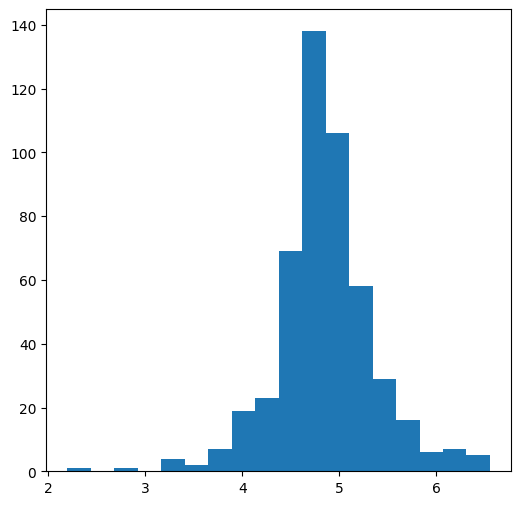

In [ ]:
plt.hist(X_train_enc['log_Loan'], bins=18)

Combine both incomes as total income and take a log transformation of the same.

(array([  1.,   7.,  15.,  43.,  82., 111.,  89.,  50.,  33.,  21.,  15.,
         11.,   4.,   1.,   4.,   2.,   1.,   1.]),
 array([ 7.27378632,  7.49758732,  7.72138833,  7.94518934,  8.16899034,
         8.39279135,  8.61659236,  8.84039336,  9.06419437,  9.28799538,
         9.51179638,  9.73559739,  9.9593984 , 10.1831994 , 10.40700041,
        10.63080141, 10.85460242, 11.07840343, 11.30220443]),
 <BarContainer object of 18 artists>)

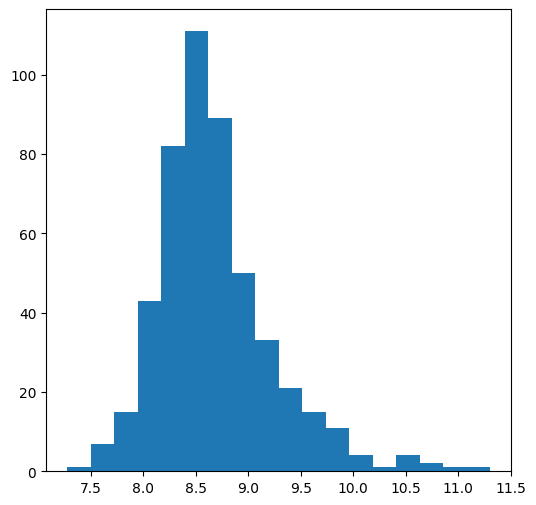

In [94]:
X_train_enc['log_total_income'] = np.log(X_train_enc['ApplicantIncome'] + X_train_enc['CoapplicantIncome'])
plt.hist(X_train_enc['log_total_income'], bins=18)

In [95]:
X_train_enc.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
0                    0
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    0
log_Loan             0
log_total_income     0
dtype: int64

In [96]:
X_train_enc.drop(columns=['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [97]:
X_train_enc.head()

,Loan_Amount_Term,0,1,2,3,4,5,6,7,8,9,log_Loan,log_total_income
0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.836282,8.453188
1,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.744932,8.324579
2,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.231109,9.251098
3,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.204693,8.262301
4,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.317488,7.797702


## 4. Building a Predictive Model

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [99]:
X_train_enc.columns = X_train_enc.columns.astype(str)
rfc.fit(X_train_enc, y_train)

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier()

In [102]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train_enc.columns).sort_values(ascending=False)

feature_scores

7                   0.261325
log_total_income    0.256867
log_Loan            0.228513
Loan_Amount_Term    0.045671
8                   0.030169
1                   0.026992
9                   0.025451
5                   0.024154
2                   0.022829
0                   0.021903
6                   0.019729
3                   0.018679
4                   0.017720
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

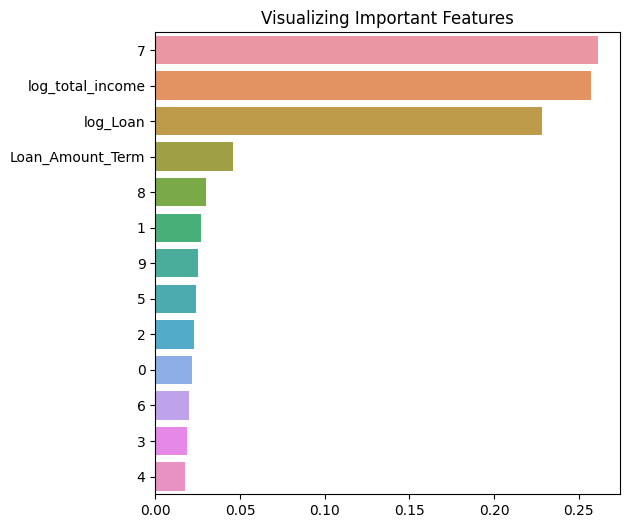

In [103]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.title('Visualizing Important Features')

Feature 7 is the encoded Credit_History

In [ ]:
X_test_num = pd.DataFrame(imp_median.transform(X_test[num_features]), columns=num_features)
X_test_cat = pd.DataFrame(imp_mode.transform(X_test[cat_features]), columns=cat_features)
X_test_clean = pd.concat([X_test_num, X_test_cat], axis=1)

test_encoded = encoder.transform(X_test_clean[cat_features])
test_encoded_df = pd.DataFrame.sparse.from_spmatrix(test_encoded)

X_test_clean_num = X_test_clean[num_features]
X_test_enc = pd.concat([X_test_clean_num, test_encoded_df], axis=1)

X_test_enc['log_Loan'] = np.log(X_test_enc['LoanAmount'])
X_test_enc['log_total_income'] = np.log(X_test_enc['ApplicantIncome'] + X_test_enc['CoapplicantIncome'])
X_test_enc.drop(columns=['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'], inplace=True)
X_test_enc.shape

(123, 13)

In [ ]:
X_test_enc.columns = X_test_enc.columns.astype(str)
y_pred = rfc.predict(X_test_enc)

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8048780487804879

Try paramater grid search to improve the results

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 500, 750],
            'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid)

In [ ]:
grid.fit(X_train_enc, y_train)

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be c

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 500, 750]})

In [ ]:
y_pred = grid.predict(X_test_enc)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7967479674796748


c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_enc, y_train)

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


SVC()

In [ ]:
y_pred = svc.predict(X_test_enc)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6829268292682927


c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
svc_params = {'C': [.01, .1, 1, 10]}
grid = GridSearchCV(estimator=svc, param_grid=svc_params)
grid.fit(X_train_enc, y_train)


c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be c

GridSearchCV(estimator=SVC(), param_grid={'C': [0.01, 0.1, 1, 10]})

In [ ]:
y_pred = grid.predict(X_test_enc)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6829268292682927


c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

In [67]:
def log_transform(X):
    X_df = pd.DataFrame(X, columns=num_features)
    X_df['LoanAmount'] = np.log(X_df['LoanAmount'])
    X_df['log_total_income'] = np.log(X_df['ApplicantIncome'] + X_df['CoapplicantIncome'])
    X_df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
    return X_df

log_transform_obj = FunctionTransformer(log_transform)

In [68]:
cat_transform = Pipeline([
    ('impute_mode', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False)),
    ])

num_transform = Pipeline([
    ('impute_median', SimpleImputer(strategy='median')),
    ('log_transform', log_transform_obj)
])

In [69]:
preprocessing = ColumnTransformer([
    ('numeric', num_transform, num_features),
    ('categorical', cat_transform, cat_features)
])

In [ ]:
rfcPipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier())
])

In [ ]:
rfcPipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x0000023AB5FB3820>))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfcPipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x0000023AB5FB3820>))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfcPipeline.score(X_test, y_test)

0.7886178861788617

In [ ]:
param_grid = {'preprocessing__numeric__impute_median__strategy': ['median', 'mean'],
            'classifier__n_estimators': [50, 100, 400]
}

grid_search = GridSearchCV(estimator=rfcPipeline, param_grid=param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<function log_transform at 0x0000023AB5FB3820>))]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('categorical',
                                                                         Pipeli...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Property_Area'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__n_estimators': [50, 100, 400],
                         'preprocessing__numeric__impute_median__strategy': ['median',
                                                                             'mean']})

In [ ]:
grid_search.score(X_test, y_test)

0.7967479674796748

In [70]:
gnbPipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', GaussianNB())
])

In [71]:
gnbPipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x000001BA6A283280>))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', GaussianNB())])

In [72]:
gnbPipeline.score(X_test, y_test)

0.8130081300813008

### Hyperparameter Tuning for Naive Bayes

In [73]:
gnb_param_grid = {'preprocessing__numeric__impute_median__strategy': ['median', 'mean'],
                'classifier__var_smoothing': [.000001, .0001, .001, .1, 1, 10]}
gnbgrid = GridSearchCV(estimator=gnbPipeline, param_grid=gnb_param_grid)

In [74]:
gnbgrid.fit(X_train, y_train)
gnbgrid.score(X_test, y_test)

0.8130081300813008

In [107]:
test_pred = gnbgrid.predict(X_test)

Confusion Matrix


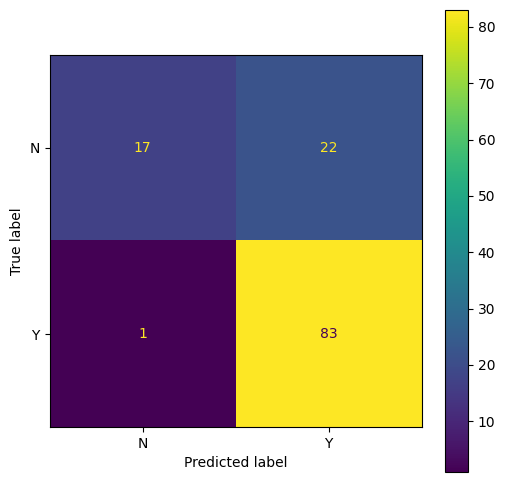

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
con_mat = confusion_matrix(y_test, test_pred, labels = gnbgrid.classes_)
print('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels=gnbgrid.classes_)
disp.plot()

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [75]:
import pickle

pickle.dump(gnbgrid, open('../src/model.sav', 'wb'))

In [56]:
json_data = X_test.fillna('NaN').tail(2).to_dict()

In [57]:
df_test = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()

In [58]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
221,Male,Yes,2,Graduate,No,4009,1717.0,116.0,360.0,1.0,Semiurban
374,Female,No,0,Graduate,NaN,2764,1459.0,110.0,360.0,1.0,Urban


In [30]:
json_data.values()

dict_values([{256: 'Male', 198: 'Female', 598: 'Male'}, {256: 'No', 198: 'Yes', 598: 'Yes'}, {256: '0', 198: '0', 598: '0'}, {256: 'Not Graduate', 198: 'Graduate', 598: 'Graduate'}, {256: 'No', 198: 'No', 598: 'Yes'}, {256: 6045, 198: 3416, 598: 9963}, {256: 0.0, 198: 2816.0, 598: 0.0}, {256: 115.0, 198: 113.0, 598: 180.0}, {256: 360.0, 198: 360.0, 598: 360.0}, {256: 0.0, 198: nan, 598: 1.0}, {256: 'Rural', 198: 'Semiurban', 598: 'Rural'}])

In [60]:
json_data

{'Gender': {221: 'Male', 374: 'Female'},
 'Married': {221: 'Yes', 374: 'No'},
 'Dependents': {221: '2', 374: '0'},
 'Education': {221: 'Graduate', 374: 'Graduate'},
 'Self_Employed': {221: 'No', 374: 'NaN'},
 'ApplicantIncome': {221: 4009, 374: 2764},
 'CoapplicantIncome': {221: 1717.0, 374: 1459.0},
 'LoanAmount': {221: 116.0, 374: 110.0},
 'Loan_Amount_Term': {221: 360.0, 374: 360.0},
 'Credit_History': {221: 1.0, 374: 1.0},
 'Property_Area': {221: 'Semiurban', 374: 'Urban'}}

In [ ]:
df = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()

In [79]:
import requests
URL = 'http://ec2-35-182-37-241.ca-central-1.compute.amazonaws.com:5000/predict'
r = requests.post(url=URL, json = json_data)

In [80]:
r.json()

['Y', 'Y']

In [36]:
json_data2 = {"Gender": "Male",
 "Married": "No",
 "Dependents": "0",
 "Education": "Not Graduate",
 "Self_Employed": "No",
 "ApplicantIncome": 6045,
 "CoapplicantIncome": 0.0,
 "LoanAmount": 115.0,
 "Loan_Amount_Term": 360.0,
 "Credit_History": 0.0,
 "Property_Area": "Rural"}

In [37]:
r = requests.post(url=URL, json = json_data2)


In [38]:
r

<Response [500]>

## Local Test

In [33]:
localURL = 'http://127.0.0.1:5000/predict'

In [63]:
r = requests.post(url=localURL, json=json_data)
print(r.json())

['Y', 'Y']


In [62]:
print(r)

<Response [500]>


In [41]:
r = requests.post(url=localURL, json=json_data2)
print(r.json())

['N']


In [78]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
affinegap                    1.12
aiohttp                      3.8.3
aiosignal                    1.2.0
aniso8601                    9.0.1
ansi2html                    0.0.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.0.5
astunparse                   1.6.3
async-timeout                4.0.2
atomicwrites                 1.4.1
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
blinker                      1.4
Bottleneck                   1.3.5
Brotli                       1.0.9
brotlipy                     0.7.0
bs4                          0.0.1
BTrees                       5.0
cachetools                   4.2.2
categorical-